O método da floresta aleatória é usado para avaliar a importância e a seleção de sinais. Após o treinamento, os modelos são selecionados 10 sinais. O modelo Kan aplicou -se a eles. Desenhos para sinais importantes são dados

Использован метод случайного леса для оценки важности и отбора признаков. после обучения модели отобраны 10 признаков. К ним применена модель KAN . Приведены рисунки для важных признаков

In [22]:
import torch
from kan import KAN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import torch.optim as optim

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
#!pip install xgboost

In [23]:
df = pd.read_csv("/home/nail/Documents/Natalia/IoT/Datas/CIC_IOT_Dataset2023/IoT_Intrusion/IoT_Intrusion.csv")

In [24]:
df = df.dropna()

In [25]:
X = df[df.columns[0:-1]].fillna(0).reset_index(drop=True)
y = df['label']== 'BenignTraffic'

In [26]:
# Splitting data to train val test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=5)

# Converting data to Torch tensor
train_input = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
train_label = torch.tensor(y_train.to_numpy(), dtype=torch.long)
val_input = torch.tensor(X_val.to_numpy(), dtype=torch.float32)
val_label = torch.tensor(y_val.to_numpy(), dtype=torch.long)
test_input = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
test_label = torch.tensor(y_test.to_numpy(), dtype=torch.long)

# Проверка размеров полученных выборок
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")


Train size: 734002
Validation size: 157286
Test size: 157287


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Обучаем случайный лес для оценки важности признаков
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Получаем важность признаков
importance = model.feature_importances_

# Сортируем по важности
indices = np.argsort(importance)[::-1]

In [28]:
# Выбираем топ-N признаков
N = 10
top_n_indices = indices[:N]

# Отбираем только топ-N признаков из обучающего набора
X_train_selected = X_train.iloc[:, top_n_indices]  # Для DataFrame используем iloc
X_val_selected = X_val.iloc[:, top_n_indices]      # Для DataFrame используем iloc

In [29]:
# Обучение модели на отобранных признаках
model = RandomForestClassifier()
model.fit(X_train_selected, y_train)

# Прогнозирование на валидационных данных
y_pred = model.predict(X_val_selected)

# Оценка точности
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy with top {N} features: {accuracy:.4f}")

Accuracy with top 10 features: 0.9972


In [9]:
X_train_selected

,IAT,rst_count,urg_count,flow_duration,Number,Header_Length,Duration,Weight,Variance,Srate
64215,83149686.83,0.00,0.0,0.000000,9.5,0.00,64.00,141.55,0.00,2.322149
378588,83344184.37,0.00,0.0,0.000000,9.5,54.00,64.00,141.55,0.00,79.818528
186788,83128617.16,0.00,0.0,0.000000,9.5,0.00,64.00,141.55,0.00,24.961341
116484,83101928.61,0.00,0.0,0.063868,9.5,21915.00,64.00,141.55,0.00,7605.634528
295905,83331875.55,1.00,1.0,0.000000,9.5,54.00,64.00,141.55,0.00,14.355329
...,...,...,...,...,...,...,...,...,...,...
756710,83150696.65,0.00,0.0,0.000000,9.5,0.00,64.00,141.55,0.00,1.038803
124605,83663626.71,0.00,0.0,0.000000,9.5,0.00,63.36,141.55,0.30,31.876334
544751,82985264.79,0.00,0.0,3.943463,9.5,108.00,64.00,141.55,0.00,0.507168
18638,83365540.11,0.01,0.0,0.105190,9.5,86.75,63.77,141.55,0.19,10.125009


In [10]:
X_val_selected

,IAT,rst_count,urg_count,flow_duration,Number,Header_Length,Duration,Weight,Variance,Srate
447708,83362136.78,0.00,0.00,0.121151,9.5,88.56,64.00,141.55,0.00,10.601659
440201,83149382.60,0.00,0.00,0.000000,9.5,1.02,65.91,141.55,0.04,22.572594
781989,83331782.40,0.99,0.99,0.000321,9.5,58.57,63.83,141.55,0.09,62.560491
947549,83064245.26,0.00,0.00,0.000000,9.5,54.00,64.00,141.55,0.00,1.003911
875096,82985888.08,0.60,0.22,0.046086,9.5,226.91,65.69,141.55,0.30,15.320078
...,...,...,...,...,...,...,...,...,...,...
334459,83067539.33,0.00,0.00,0.000000,9.5,54.00,64.00,141.55,0.00,1.346031
740678,83330921.38,0.99,0.99,0.000000,9.5,55.76,65.91,141.55,0.18,1.156825
465070,83123749.83,0.00,0.00,0.057487,9.5,23685.00,64.00,141.55,0.00,8918.902154
253288,83663586.59,0.00,0.00,0.000000,9.5,0.00,64.00,141.55,0.00,0.719450


In [12]:
import torch
import torch.optim as optim
import time
import numpy as np

# Проверка доступности устройства (GPU или CPU)
device = torch.device("cpu")  # Или "cuda" для GPU

# Инициализация модели
model = KAN(width=[10, 2], grid=10, k=3)  # Убедитесь, что модель корректно определена

# Перемещаем модель на устройство
model.to(device)

# Подготовка данных
X_train_selected = X_train.iloc[:, top_n_indices].to_numpy()
X_val_selected = X_val.iloc[:, top_n_indices].to_numpy()
X_test_selected = X_test.iloc[:, top_n_indices].to_numpy()

# Преобразуем отобранные данные в тензоры
train_input = torch.tensor(X_train_selected, dtype=torch.float32).to(device)
val_input = torch.tensor(X_val_selected, dtype=torch.float32).to(device)
test_input = torch.tensor(X_test_selected, dtype=torch.float32).to(device)

train_label = train_label.to(device)
val_label = val_label.to(device)
test_label = test_label.to(device)

# Проверка размеров данных
print(f"Train input shape: {train_input.shape}")
print(f"Val input shape: {val_input.shape}")
print(f"Test input shape: {test_input.shape}")

checkpoint directory created: ./model
saving model version 0.0
Train input shape: torch.Size([734002, 10])
Val input shape: torch.Size([157286, 10])
Test input shape: torch.Size([157287, 10])


In [15]:
# Оптимизатор
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Функция потерь
criterion = torch.nn.CrossEntropyLoss()

# Функция для вычисления точности
def train_acc():
    model.eval()  # Убедимся, что модель в режиме оценки (без обновления градиентов)
    with torch.no_grad():
        preds = torch.argmax(model(train_input), dim=1)
        accuracy = torch.mean((preds == train_label).float())
    print(f"Train Accuracy: {accuracy.item():.4f}")
    return accuracy

def test_acc():
    model.eval()
    with torch.no_grad():
        preds = torch.argmax(model(test_input), dim=1)
        accuracy = torch.mean((preds == test_label).float())
    print(f"Test Accuracy: {accuracy.item():.4f}")
    return accuracy

In [17]:
# Оптимизатор Adam не требует closure
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Замер времени обучения
start_train_time = time.perf_counter()

# Обучение модели
for step in range(100):  # Количество шагов (итераций)
    try:
        # Обнуляем градиенты
        optimizer.zero_grad()
        
        # Прогон через модель
        outputs = model(train_input)
        
        # Вычисляем функцию потерь
        loss = criterion(outputs, train_label)
        
        # Вычисляем градиенты
        loss.backward()
        
        # Шаг оптимизатора
        optimizer.step()
        
        # Печать каждые 10 шагов
        if step % 10 == 0:
            print(f"Step {step}, Loss: {loss.item():.4f}")
    except Exception as e:
        print(f"Error at step {step}: {str(e)}")
        break

end_train_time = time.perf_counter()

# Замер времени выполнения предсказаний
start_predict_time = time.perf_counter()

model.eval()
with torch.no_grad():
    val_pred = model(val_input)

end_predict_time = time.perf_counter()

# После тренировки модели вычисляем точность
train_accuracy = train_acc()
val_accuracy = test_acc()

# Вывод результатов
print(f"Train Accuracy: {train_accuracy.item():.4f}")
print(f"Validation Accuracy: {val_accuracy.item():.4f}")

# Вывод времени обучения и времени предсказания
train_time = end_train_time - start_train_time
predict_time = end_predict_time - start_predict_time
print(f"Training Time: {train_time:.4f} seconds")
print(f"Prediction Time: {predict_time:.4f} seconds")

# Освобождаем память
torch.cuda.empty_cache()


Step 0, Loss: 42536300.0000
Step 10, Loss: 40910768.0000
Step 20, Loss: 39285232.0000
Step 30, Loss: 37659700.0000
Step 40, Loss: 36034156.0000
Step 50, Loss: 34408612.0000
Step 60, Loss: 32783070.0000
Step 70, Loss: 31157522.0000
Step 80, Loss: 29531976.0000
Step 90, Loss: 27906434.0000
Train Accuracy: 0.0209
Test Accuracy: 0.0208
Train Accuracy: 0.0209
Validation Accuracy: 0.0208
Training Time: 347.2368 seconds
Prediction Time: 0.6108 seconds


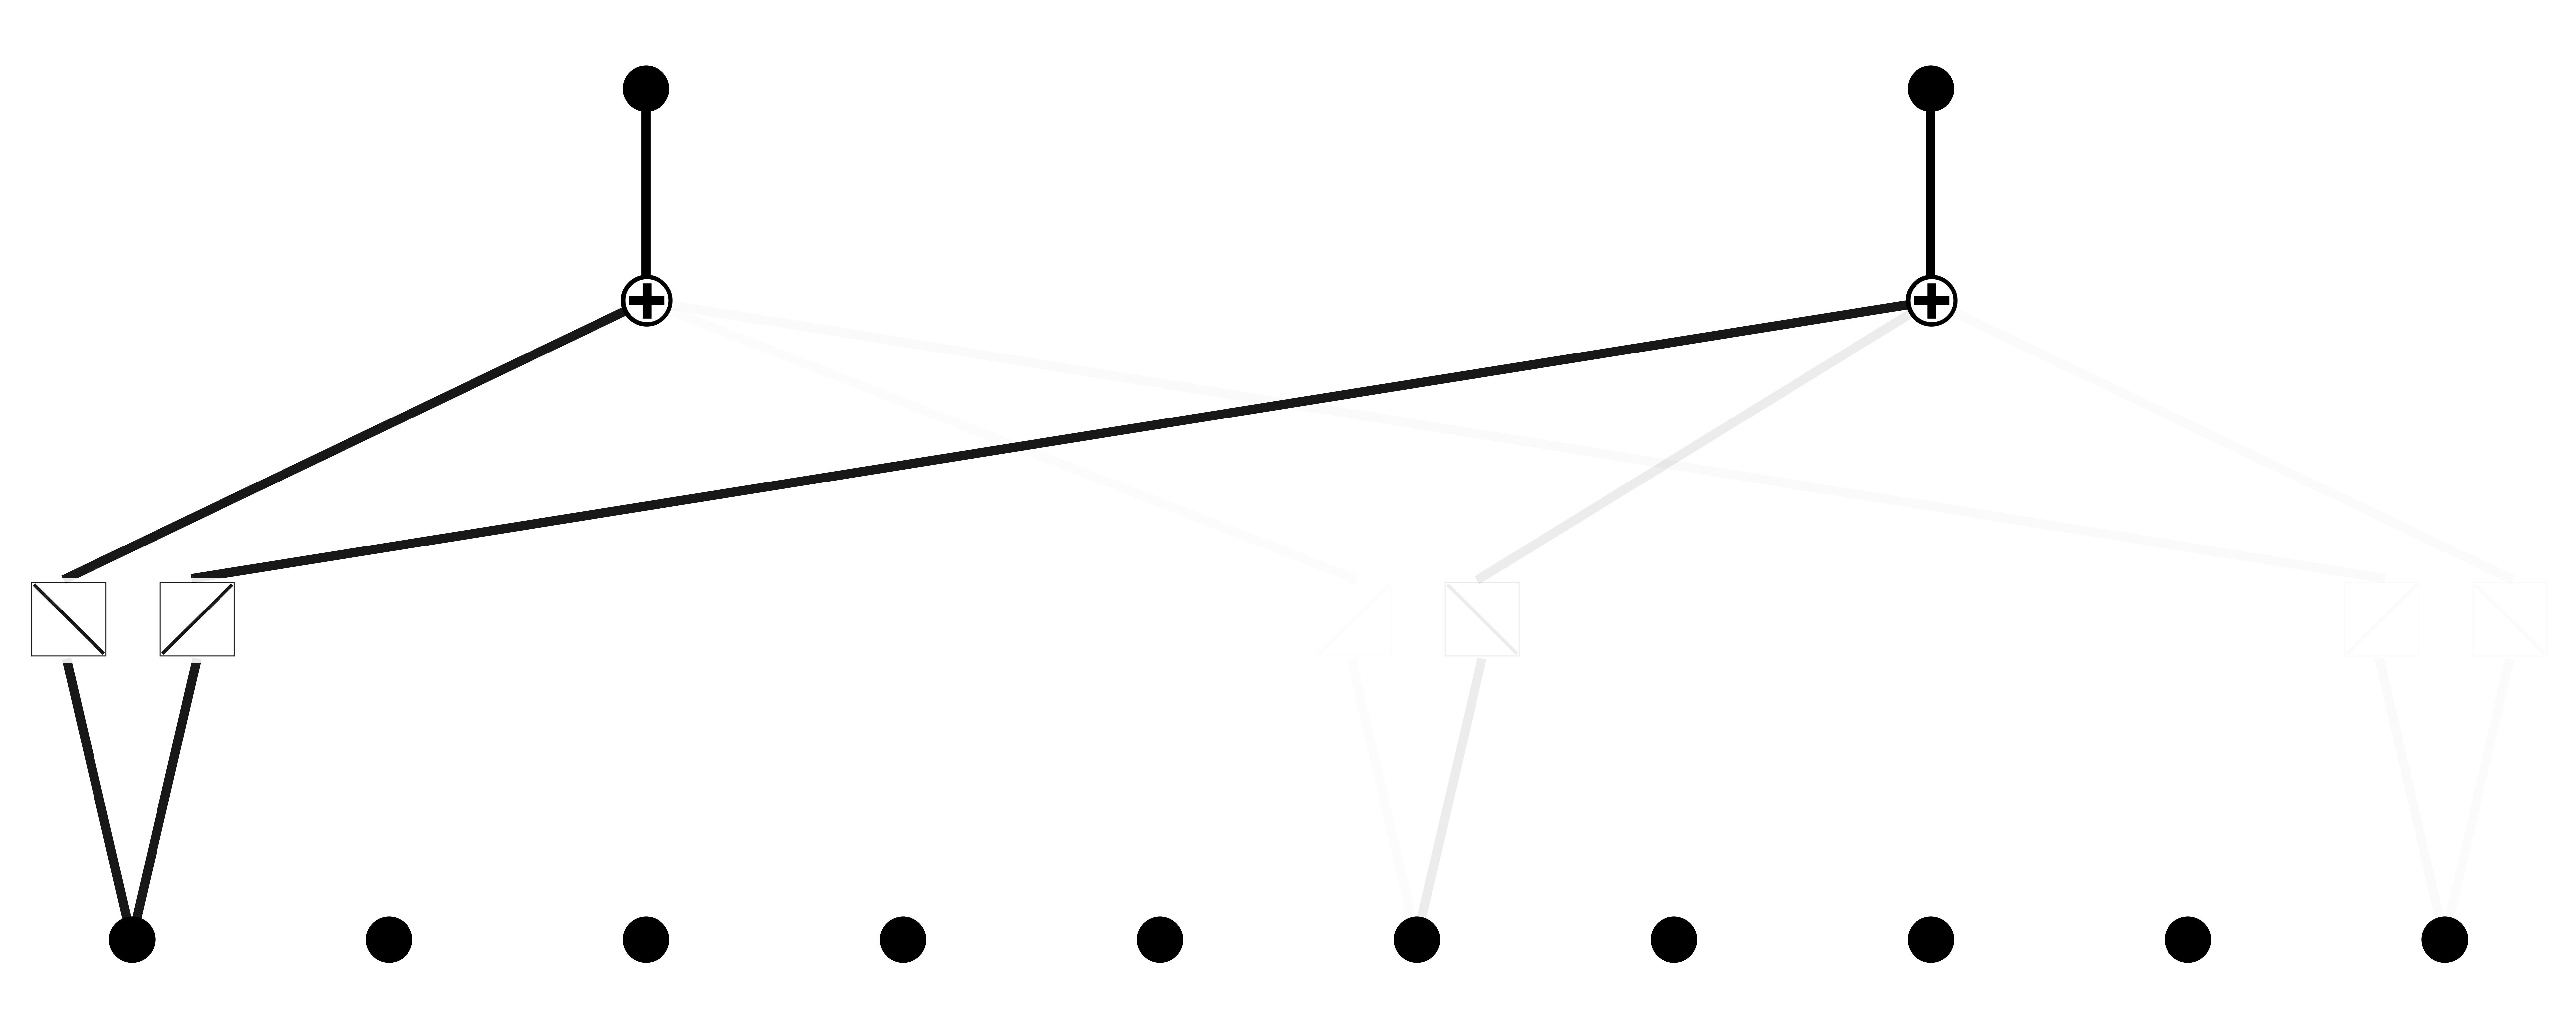

In [20]:
# Plotting KAN network
model.plot(scale=10)
plt.savefig('saved_graph.png')

In [19]:
import matplotlib.pyplot as plt

# Сохранение текущего графика в файл (например, PNG)
plt.savefig('saved_graph.png')

<Figure size 640x480 with 0 Axes>

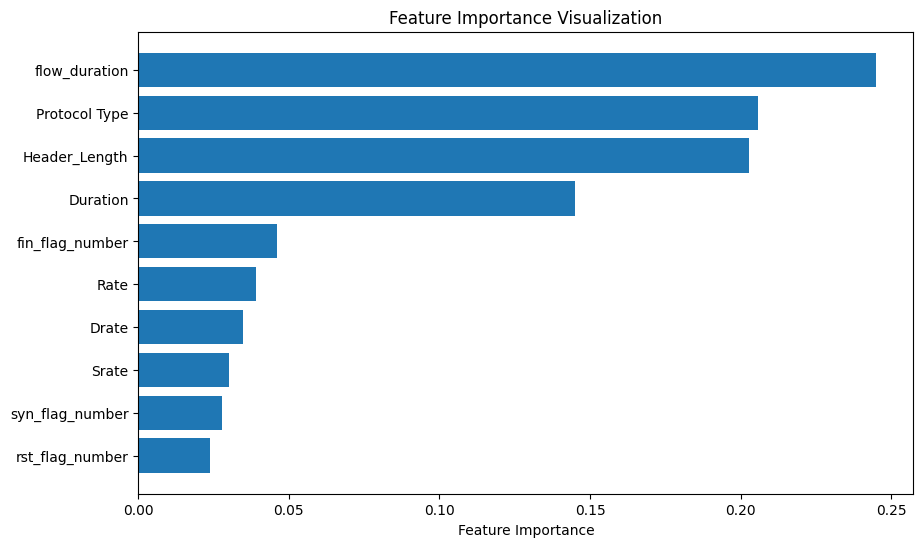

<Figure size 640x480 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Получаем важность признаков
importance = model.feature_importances_

# Сортируем по важности
indices = np.argsort(importance)[::-1]

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance[indices], align='center')
plt.yticks(range(len(importance)), X_train.columns[indices])  # Используем имена признаков
plt.xlabel('Feature Importance')
plt.title('Feature Importance Visualization')
plt.gca().invert_yaxis()  # Сортировка по убыванию
plt.show()
plt.savefig('saved_graph_1.png')

In [33]:
plt.savefig('saved_graph_1.png')

<Figure size 640x480 with 0 Axes>

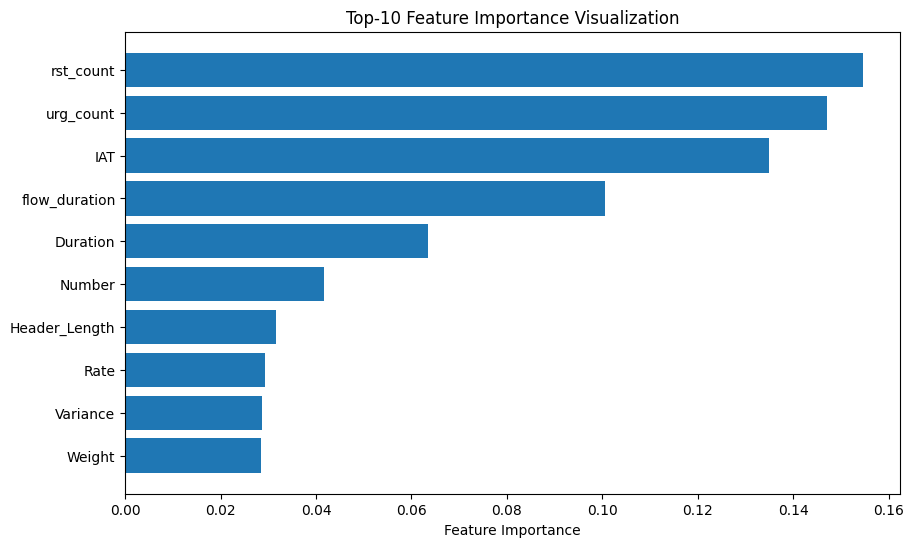

In [30]:
N = 10  # Количество топ-признаков
top_n_indices = indices[:N]  # Индексы топ-N признаков

# Визуализация топ-N признаков
plt.figure(figsize=(10, 6))
plt.barh(range(N), importance[top_n_indices], align='center')
plt.yticks(range(N), X_train.columns[top_n_indices])  # Используем имена признаков
plt.xlabel('Feature Importance')
plt.title(f'Top-{N} Feature Importance Visualization')
plt.gca().invert_yaxis()  # Сортировка по убыванию
plt.show()
plt.savefig('saved_graph_2.png')

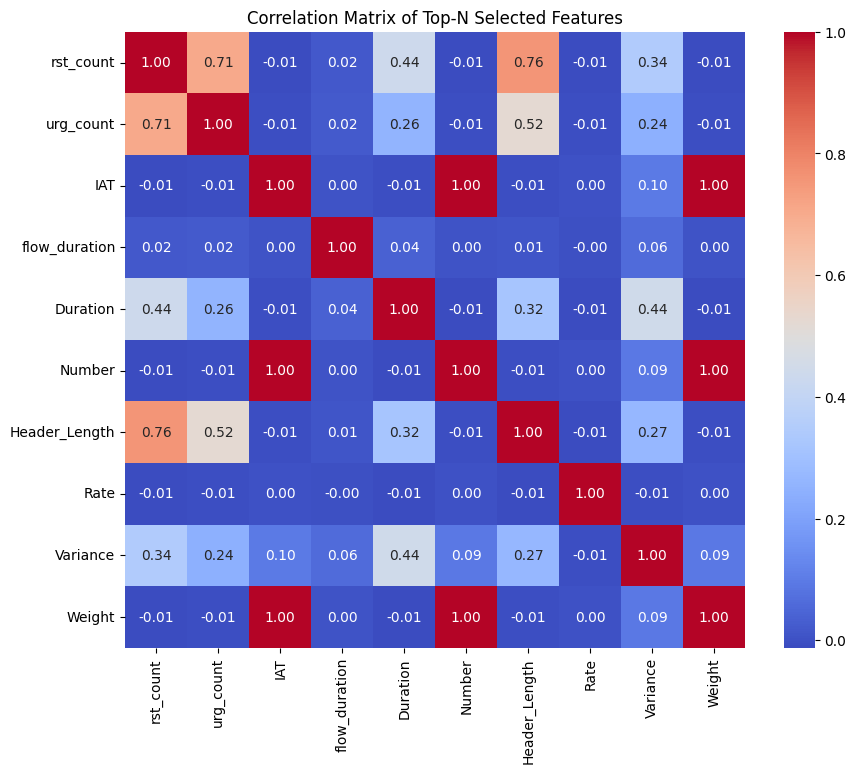

<Figure size 640x480 with 0 Axes>

In [32]:
import seaborn as sns

# Корреляция между топ-N признаками
corr_matrix = X_train.iloc[:, top_n_indices].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Top-N Selected Features')
plt.show()
plt.savefig('saved_graph_3.png')